# The competition game for SBC inclass activity 

This data set is from EIA RECS dataset

** 1. Read dataset and assign feature/target **

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time

%matplotlib inline

In [25]:
data = pd.read_csv('data_train.csv')

In [26]:
data.head()

,KWHSPH,KWHCOL,KWHWTH,KWHRFG,KWHRFG1,KWHRFG2,KWHFRZ,KWHCOK,KWHMICRO,KWHCW,...,KWHAHUCOL,KWHEVAPCOL,KWHCFAN,KWHDHUM,KWHHUM,KWHPLPMP,KWHHTBPMP,KWHHTBHEAT,KWHNEC,location
0,0.000,2470.968,0.000,750.112,750.112,0.0,684.041,77.242,49.288,62.709,...,144.764,0.0,297.715,0.000,0.000,2887.707,0.0,0.0,683.818,3
1,0.000,1021.895,0.000,439.497,439.497,0.0,0.000,0.000,147.380,31.884,...,57.295,0.0,28.819,891.577,414.799,0.000,0.0,0.0,920.742,1
2,391.536,2163.968,1942.496,238.815,238.815,0.0,0.000,468.672,190.723,43.525,...,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,674.045,1
3,0.000,5048.313,0.000,933.728,933.728,0.0,0.000,58.168,276.188,70.097,...,381.525,0.0,394.780,0.000,0.000,0.000,0.0,0.0,923.294,1
4,0.000,3481.878,1507.820,445.400,445.400,0.0,0.000,67.275,19.855,57.805,...,148.626,0.0,0.000,0.000,0.000,0.000,0.0,0.0,245.396,1


In [27]:
len(data)

4000

In [28]:
X = data.iloc[:,:26]

In [29]:
X.head()

,KWHSPH,KWHCOL,KWHWTH,KWHRFG,KWHRFG1,KWHRFG2,KWHFRZ,KWHCOK,KWHMICRO,KWHCW,...,KWHAHUHEAT,KWHAHUCOL,KWHEVAPCOL,KWHCFAN,KWHDHUM,KWHHUM,KWHPLPMP,KWHHTBPMP,KWHHTBHEAT,KWHNEC
0,0.000,2470.968,0.000,750.112,750.112,0.0,684.041,77.242,49.288,62.709,...,185.018,144.764,0.0,297.715,0.000,0.000,2887.707,0.0,0.0,683.818
1,0.000,1021.895,0.000,439.497,439.497,0.0,0.000,0.000,147.380,31.884,...,611.441,57.295,0.0,28.819,891.577,414.799,0.000,0.0,0.0,920.742
2,391.536,2163.968,1942.496,238.815,238.815,0.0,0.000,468.672,190.723,43.525,...,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,674.045
3,0.000,5048.313,0.000,933.728,933.728,0.0,0.000,58.168,276.188,70.097,...,173.654,381.525,0.0,394.780,0.000,0.000,0.000,0.0,0.0,923.294
4,0.000,3481.878,1507.820,445.400,445.400,0.0,0.000,67.275,19.855,57.805,...,0.000,148.626,0.0,0.000,0.000,0.000,0.000,0.0,0.0,245.396


In [30]:
Y = data['location']

In [31]:
Y.head()

0    3
1    1
2    1
3    1
4    1
Name: location, dtype: int64

In [32]:
set(Y)

{1, 2, 3}

In [33]:
import collections

collections.Counter(Y)

Counter({1: 2759, 2: 436, 3: 805})

** 2. Split the dataset **

In [34]:
#from sklearn.model_selection import train_test_split  

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

** 3. Assign/train/cross-validate models **

In [35]:
from sklearn import tree, svm, neighbors, neural_network, ensemble

In [36]:
model1 = tree.DecisionTreeClassifier()
model2 = svm.LinearSVC()
model3 = neighbors.KNeighborsClassifier()
model4 = neural_network.MLPClassifier()
model5 = ensemble.RandomForestClassifier()

In [37]:
model1.fit(X, Y)
model2.fit(X, Y)
model3.fit(X, Y)
model4.fit(X, Y)
model5.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
from sklearn.model_selection import cross_validate

model1_cv = cross_validate(model1, X, Y, scoring='precision_macro', cv=5, return_train_score=False)
model2_cv = cross_validate(model2, X, Y, scoring='precision_macro', cv=5, return_train_score=False)
model3_cv = cross_validate(model3, X, Y, scoring='precision_macro', cv=5, return_train_score=False)
model4_cv = cross_validate(model4, X, Y, scoring='precision_macro', cv=5, return_train_score=False)
model5_cv = cross_validate(model5, X, Y, scoring='precision_macro', cv=5, return_train_score=False)

In [39]:
print('decision tree', np.mean(model1_cv['test_score']))
print('svm', np.mean(model2_cv['test_score']))
print('knn', np.mean(model3_cv['test_score']))
print('mlp', np.mean(model4_cv['test_score']))
print('random forest', np.mean(model5_cv['test_score']))

('decision tree', 0.3992220949176518)
('svm', 0.41926009136767295)
('knn', 0.44509027028710085)
('mlp', 0.4161129738048822)
('random forest', 0.43553326865749786)


** 4. Improve your model using grid search and randomized search **

** 4.1 Grid search (if you know the parameters of your algorithm) **

In [46]:
from sklearn.model_selection import GridSearchCV

** Model 3: Knn algorithm **

In [69]:
neighbors.KNeighborsClassifier?

In [83]:
start_GS = time.time()
parameters = {'n_neighbors': range(1,1001,10)}
model3_GS = GridSearchCV(model3, parameters, cv=5, scoring='precision_macro', return_train_score=False)
model3_GS.fit(X, Y)
print('Time spent on grid seach for SVM algorithm: %fs' % (time.time() - start_GS))

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

Time spent on grid seach for SVM algorithm: 89.090475s


/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
model3_GS.cv_results_

{'mean_fit_time': array([0.00414143, 0.00373802, 0.00392766, 0.00407243, 0.00385442,
        0.00385499, 0.00379934, 0.00417519, 0.00447984, 0.00458183,
        0.00429544, 0.00398121, 0.0040946 , 0.00389857, 0.00407662,
        0.00401263, 0.00559897, 0.00447798, 0.00499148, 0.00413399,
        0.0047823 , 0.00450511, 0.00436339, 0.00498343, 0.00442495,
        0.00405903, 0.00399904, 0.0041604 , 0.00452361, 0.00476723,
        0.00423617, 0.0064784 , 0.00473104, 0.00478845, 0.00451112,
        0.00455966, 0.00447521, 0.00483756, 0.00515242, 0.00485344,
        0.00442638, 0.00442538, 0.00425301, 0.00454354, 0.00482283,
        0.00476637, 0.00477862, 0.00512342, 0.00459213, 0.00508633,
        0.00465479, 0.00544486, 0.0044992 , 0.00469503, 0.00450559,
        0.00496163, 0.00452294, 0.00463243, 0.00453224, 0.0047564 ,
        0.00510912, 0.00543461, 0.00471959, 0.00488539, 0.00424147,
        0.00449581, 0.00455599, 0.00457382, 0.00463986, 0.00468082,
        0.00438595, 0.0042902 ,

In [85]:
model3_GS.cv_results_['params']

[{'n_neighbors': 1},
 {'n_neighbors': 11},
 {'n_neighbors': 21},
 {'n_neighbors': 31},
 {'n_neighbors': 41},
 {'n_neighbors': 51},
 {'n_neighbors': 61},
 {'n_neighbors': 71},
 {'n_neighbors': 81},
 {'n_neighbors': 91},
 {'n_neighbors': 101},
 {'n_neighbors': 111},
 {'n_neighbors': 121},
 {'n_neighbors': 131},
 {'n_neighbors': 141},
 {'n_neighbors': 151},
 {'n_neighbors': 161},
 {'n_neighbors': 171},
 {'n_neighbors': 181},
 {'n_neighbors': 191},
 {'n_neighbors': 201},
 {'n_neighbors': 211},
 {'n_neighbors': 221},
 {'n_neighbors': 231},
 {'n_neighbors': 241},
 {'n_neighbors': 251},
 {'n_neighbors': 261},
 {'n_neighbors': 271},
 {'n_neighbors': 281},
 {'n_neighbors': 291},
 {'n_neighbors': 301},
 {'n_neighbors': 311},
 {'n_neighbors': 321},
 {'n_neighbors': 331},
 {'n_neighbors': 341},
 {'n_neighbors': 351},
 {'n_neighbors': 361},
 {'n_neighbors': 371},
 {'n_neighbors': 381},
 {'n_neighbors': 391},
 {'n_neighbors': 401},
 {'n_neighbors': 411},
 {'n_neighbors': 421},
 {'n_neighbors': 431},

In [87]:
model3_GS.cv_results_['mean_test_score']

array([0.39663392, 0.43041774, 0.40349197, 0.39809698, 0.40095996,
       0.40404004, 0.40111298, 0.41070719, 0.41162852, 0.40339204,
       0.41059769, 0.41090199, 0.41296601, 0.41292666, 0.41439436,
       0.41638036, 0.41483029, 0.41524793, 0.41100193, 0.40907719,
       0.41428686, 0.42503542, 0.41997051, 0.41456933, 0.41738012,
       0.41803104, 0.4205907 , 0.41442853, 0.42245085, 0.42064571,
       0.41810463, 0.4171041 , 0.418364  , 0.42066072, 0.41552095,
       0.42289693, 0.42587815, 0.42446711, 0.43411707, 0.44266955,
       0.43779298, 0.42276323, 0.38377185, 0.37874933, 0.31061183,
       0.34678831, 0.29664091, 0.29664091, 0.29664091, 0.22991667,
       0.22991667, 0.22991667, 0.22991667, 0.22991667, 0.22991667,
       0.22991667, 0.22991667, 0.22991667, 0.22991667, 0.22991667,
       0.22991667, 0.22991667, 0.22991667, 0.22991667, 0.22991667,
       0.22991667, 0.22991667, 0.22991667, 0.22991667, 0.22991667,
       0.22991667, 0.22991667, 0.22991667, 0.22991667, 0.22991

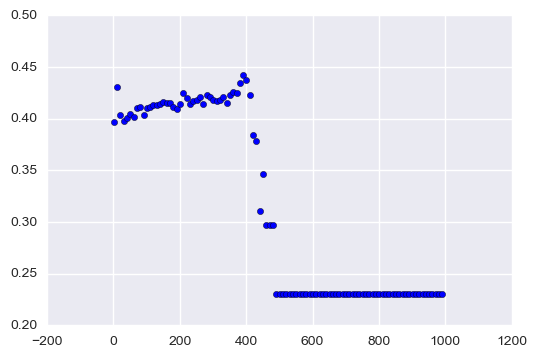

In [101]:
plt.scatter(x=range(1,1001,10), y=model3_GS.cv_results_['mean_test_score'])

In [88]:
model3_GS.best_params_

{'n_neighbors': 391}

In [89]:
model3_GS.best_score_

0.4426695484379554

In [118]:
model3_GS.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=391, p=2,
           weights='uniform')

** Model 4 MLP classifier **

In [131]:
neural_network.MLPClassifier?

In [132]:
start_GS = time.time()
parameters = {'hidden_layer_sizes': range(1,101,5), 'activation': ['identity', 'logistic', 'tanh', 'relu']}
model4_GS = GridSearchCV(model4, parameters, cv=5, scoring='precision_macro', return_train_score=False)
model4_GS.fit(X, Y)
print('Time spent on grid seach for MLP classifier algorithm: %fs' % (time.time() - start_GS))

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

Time spent on grid seach for MLP classifier algorithm: 146.516378s


In [133]:
model4_GS.cv_results_

{'mean_fit_time': array([0.40700336, 0.15532246, 0.18663325, 0.17612634, 0.14557676,
        0.16824865, 0.15603919, 0.15225258, 0.12272916, 0.10191679,
        0.16955895, 0.11863141, 0.09899087, 0.09291396, 0.16608424,
        0.14493985, 0.13138356, 0.1106122 , 0.13175478, 0.15146666,
        0.53602705, 0.36641521, 0.41760778, 0.26959257, 0.36466756,
        0.43447819, 0.36756034, 0.51823463, 0.56781878, 0.55867767,
        0.45340238, 0.58633504, 0.70321245, 0.50966749, 0.47961001,
        0.49158177, 0.55243931, 0.56509142, 0.54571075, 0.51364236,
        0.41060181, 0.37362294, 0.51352515, 0.36881685, 0.49375505,
        0.45102291, 0.36182032, 0.39508076, 0.48672304, 0.36546497,
        0.49573278, 0.38563676, 0.46052938, 0.58636122, 0.40694566,
        0.45423641, 0.47581859, 0.55235462, 0.49200864, 0.47316084,
        0.59843864, 0.28874907, 0.52206683, 0.26455703, 0.62145419,
        0.31602798, 0.34918842, 0.16062903, 0.34079399, 0.31547203,
        0.17598701, 0.07836142,

In [134]:
model4_GS.cv_results_['params']

[{'activation': 'identity', 'hidden_layer_sizes': 1},
 {'activation': 'identity', 'hidden_layer_sizes': 6},
 {'activation': 'identity', 'hidden_layer_sizes': 11},
 {'activation': 'identity', 'hidden_layer_sizes': 16},
 {'activation': 'identity', 'hidden_layer_sizes': 21},
 {'activation': 'identity', 'hidden_layer_sizes': 26},
 {'activation': 'identity', 'hidden_layer_sizes': 31},
 {'activation': 'identity', 'hidden_layer_sizes': 36},
 {'activation': 'identity', 'hidden_layer_sizes': 41},
 {'activation': 'identity', 'hidden_layer_sizes': 46},
 {'activation': 'identity', 'hidden_layer_sizes': 51},
 {'activation': 'identity', 'hidden_layer_sizes': 56},
 {'activation': 'identity', 'hidden_layer_sizes': 61},
 {'activation': 'identity', 'hidden_layer_sizes': 66},
 {'activation': 'identity', 'hidden_layer_sizes': 71},
 {'activation': 'identity', 'hidden_layer_sizes': 76},
 {'activation': 'identity', 'hidden_layer_sizes': 81},
 {'activation': 'identity', 'hidden_layer_sizes': 86},
 {'activatio

In [135]:
model4_GS.cv_results_['mean_test_score']

array([0.39051602, 0.38931735, 0.37601243, 0.39170452, 0.39830694,
       0.39326959, 0.41345617, 0.4158251 , 0.43462257, 0.41810874,
       0.39076569, 0.40947782, 0.40320037, 0.3991721 , 0.42184719,
       0.41506739, 0.37019883, 0.42650172, 0.41822589, 0.38844962,
       0.22989073, 0.29857591, 0.35397247, 0.38368204, 0.39845713,
       0.41907083, 0.39459816, 0.4276005 , 0.3946865 , 0.39204081,
       0.40295281, 0.404321  , 0.40741283, 0.50872891, 0.4355293 ,
       0.44329997, 0.40679278, 0.39836657, 0.39719652, 0.46037014,
       0.22981268, 0.37305979, 0.39198544, 0.35587177, 0.39386871,
       0.37994253, 0.43826176, 0.38783816, 0.37326238, 0.41564016,
       0.40980415, 0.42519916, 0.39490715, 0.43980143, 0.42438818,
       0.37828259, 0.41973241, 0.39169524, 0.46877676, 0.49337359,
       0.22987067, 0.38576989, 0.4320434 , 0.39094059, 0.40345412,
       0.39998938, 0.39047754, 0.38570356, 0.39798546, 0.38529756,
       0.40298375, 0.40953437, 0.41079359, 0.40561972, 0.39812

In [136]:
model4_GS.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': 66}

In [137]:
model4_GS.best_score_

0.5087289134874864

In [138]:
model4_GS.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=66, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

** 4.2 Randomized search (when you need to explore so many combinations) **

In [40]:
from sklearn.grid_search import RandomizedSearchCV

In [61]:
ensemble.RandomForestClassifier?

In [20]:
RandomizedSearchCV?

In [65]:
start_RS = time.time()
parameters = {'n_estimators': range(1,100,1), 'criterion': ['gini', 'entropy']}
model5_RS = RandomizedSearchCV(model5, param_distributions = parameters, cv=5, scoring='precision_macro', n_iter=30)
model5_RS.fit(X, Y)
print('Time spent on grid seach for RF classifier algorithm: %fs' % (time.time() - start_RS))

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP48746/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/JP487

Time spent on grid seach for RF classifier algorithm: 82.574015s


In [66]:
model5_RS.grid_scores_

[mean: 0.45102, std: 0.02818, params: {'n_estimators': 5, 'criterion': 'gini'},
 mean: 0.48808, std: 0.07555, params: {'n_estimators': 18, 'criterion': 'entropy'},
 mean: 0.48518, std: 0.14074, params: {'n_estimators': 38, 'criterion': 'gini'},
 mean: 0.51210, std: 0.12545, params: {'n_estimators': 37, 'criterion': 'gini'},
 mean: 0.42483, std: 0.01883, params: {'n_estimators': 46, 'criterion': 'entropy'},
 mean: 0.52904, std: 0.13312, params: {'n_estimators': 40, 'criterion': 'gini'},
 mean: 0.45705, std: 0.02390, params: {'n_estimators': 6, 'criterion': 'gini'},
 mean: 0.49179, std: 0.13506, params: {'n_estimators': 57, 'criterion': 'entropy'},
 mean: 0.51941, std: 0.13873, params: {'n_estimators': 87, 'criterion': 'gini'},
 mean: 0.45045, std: 0.02619, params: {'n_estimators': 7, 'criterion': 'gini'},
 mean: 0.44446, std: 0.05508, params: {'n_estimators': 45, 'criterion': 'gini'},
 mean: 0.45859, std: 0.05967, params: {'n_estimators': 76, 'criterion': 'entropy'},
 mean: 0.50487, std

In [67]:
model5_RS.best_params_

{'criterion': 'gini', 'n_estimators': 67}

In [68]:
model5_RS.best_score_

0.6261483262386918

In [69]:
model5_RS.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=67, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

** 5. Load your test dataset**

In [49]:
test = pd.read_csv('data_test.csv')

In [50]:
len(test)

1686

In [51]:
test.head()

,KWHSPH,KWHCOL,KWHWTH,KWHRFG,KWHRFG1,KWHRFG2,KWHFRZ,KWHCOK,KWHMICRO,KWHCW,...,KWHAHUCOL,KWHEVAPCOL,KWHCFAN,KWHDHUM,KWHHUM,KWHPLPMP,KWHHTBPMP,KWHHTBHEAT,KWHNEC,location
0,882.682,0.000,0.000,421.932,421.932,0.000,0.000,0.000,115.298,32.355,...,0.000,668.412,17.334,0.000,0.0,0.0,0.0,0.0,779.021,1
1,2276.735,5254.959,1964.276,444.161,444.161,0.000,269.924,0.000,80.969,27.456,...,248.350,0.000,68.233,0.000,0.0,0.0,0.0,0.0,1637.637,3
2,0.000,2563.681,0.000,1519.563,327.825,593.337,1114.599,399.703,144.266,17.291,...,114.377,0.000,1361.027,0.000,0.0,0.0,0.0,0.0,3980.310,1
3,0.000,0.000,975.097,528.547,528.547,0.000,0.000,224.906,9.803,12.182,...,0.000,0.000,240.643,583.914,0.0,0.0,0.0,0.0,383.622,3
4,0.000,5381.523,0.000,1084.495,1084.495,0.000,0.000,17.088,0.000,20.888,...,256.605,0.000,0.000,0.000,0.0,0.0,0.0,0.0,164.368,1


In [52]:
X_test = test.iloc[:,:26]

In [53]:
X_test.head()

,KWHSPH,KWHCOL,KWHWTH,KWHRFG,KWHRFG1,KWHRFG2,KWHFRZ,KWHCOK,KWHMICRO,KWHCW,...,KWHAHUHEAT,KWHAHUCOL,KWHEVAPCOL,KWHCFAN,KWHDHUM,KWHHUM,KWHPLPMP,KWHHTBPMP,KWHHTBHEAT,KWHNEC
0,882.682,0.000,0.000,421.932,421.932,0.000,0.000,0.000,115.298,32.355,...,51.422,0.000,668.412,17.334,0.000,0.0,0.0,0.0,0.0,779.021
1,2276.735,5254.959,1964.276,444.161,444.161,0.000,269.924,0.000,80.969,27.456,...,37.518,248.350,0.000,68.233,0.000,0.0,0.0,0.0,0.0,1637.637
2,0.000,2563.681,0.000,1519.563,327.825,593.337,1114.599,399.703,144.266,17.291,...,163.892,114.377,0.000,1361.027,0.000,0.0,0.0,0.0,0.0,3980.310
3,0.000,0.000,975.097,528.547,528.547,0.000,0.000,224.906,9.803,12.182,...,343.763,0.000,0.000,240.643,583.914,0.0,0.0,0.0,0.0,383.622
4,0.000,5381.523,0.000,1084.495,1084.495,0.000,0.000,17.088,0.000,20.888,...,206.405,256.605,0.000,0.000,0.000,0.0,0.0,0.0,0.0,164.368


In [54]:
y_test = test['location']

** 6. Evaluate your model with test dataset **

In [55]:
from sklearn.metrics import accuracy_score

In [70]:
predictions_model3 = model3_GS.predict(X_test)
predictions_model4 = model4_GS.predict(X_test)
predictions_model5 = model5_RS.predict(X_test)

In [71]:
print('Tuned Knn (k=391)', accuracy_score(y_test, predictions_model3))
print('Tuned MLP (hl=66, logistic)', accuracy_score(y_test, predictions_model4))
print('Tuned RF (trees=67, gini)', accuracy_score(y_test, predictions_model5))

('Tuned RF (trees=39, gini)', 0.7158956109134045)


** Save & test your model (Pickle library) **

In [17]:
#import pickle

# Save to file in the current working directory
#pkl_filename = "model_team_June.pkl"  
#with open(pkl_filename, 'wb') as file:  
#    pickle.dump(model3, file)

In [33]:
# Load from file
#pkl_filename = "model_team_June.pkl" 
#with open(pkl_filename, 'rb') as file:  
#    model_team_June = pickle.load(file)

# Calculate the accuracy score and predict target values
#score_team_1 = model_team_1.score(X_test, y_test)  
#print("Test score for June model: {0:.2f} %".format(100 * score_team_1))

Test score for June model: 68.74 %


In [34]:
#predictions = model_team_June.predict(X_test)

In [36]:
#from sklearn.metrics import confusion_matrix

#cm = confusion_matrix(y_test, predictions)
#print(cm)

[[1088   19   62]
 [ 136    5   21]
 [ 281    8   66]]
